# Exploratory Data Analysis of Real Estate Data Set

### Introduction
[Data Set](https://www.kaggle.com/argonalyst/sao-paulo-real-estate-sale-rent-april-2019) originally compiled for regression analysis and predictive tasks of apartments for rent in Sao Paulo/Brazil.

Then I performed some preprocessing, filtering just rent cases, and did feature engineering to include the distance to the nearest metro station, which can be seen on my [GitHub](https://github.com/marciohssilveira/house_prices_sp).

The data set I will be using here consists of price, location, characteristics such as number of rooms and toilets, distance to city center and to nearest subway station.

### Exploring the Data

##### Brief description of the data set and a summary of its attributes

In [1]:
# Loading libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
rent_data = pd.read_csv('rent_data.csv')

# First five rows of the data set
rent_data.head()

,price,size,rooms,toilets,suites,parking_spots,elevator,furnished,swimming_pool,district,nearest_station_distance,distance_to_city_center
0,1150,47,2,2,1,1,0,0,0,Artur Alvim,621.331436,17720.385734
1,1148,45,2,2,1,1,0,0,0,Artur Alvim,884.502105,17578.214518
2,1100,48,2,2,1,1,0,0,0,Artur Alvim,224.069980,17034.182851
3,1200,48,2,2,1,1,0,0,0,Artur Alvim,562.768597,17323.117224
4,1710,55,2,2,1,1,1,0,0,Artur Alvim,1192.254932,17482.441498


In [2]:
# Shape of the data set
print(f'There are {rent_data.shape[0]} rows and {rent_data.shape[1]} columns in dataset.')

There are 6712 rows and 12 columns in dataset.


#### Data Set Summary

We have:
1) ```price``` = The monthly rent price
2) ```size``` = The apartment size in square metres
3) ```rooms``` = The number of bedrooms
4) ```toilets``` = The number of toilets
5) ```suites``` = The number of suites
6) ```parking_spots``` = The number of parking spots at the condo garage
7) ```elevator``` = Whether the building has elevators
8) ```swimming_pool``` = Whether the building has a swimming pool
9) ```district``` = The neighbourhood
10) ```nearest_station_distance``` = The distance to the nearest subway stations
11) ```distance_to_city_center``` = The distance to the city centre

In [3]:
# Data types
rent_data.dtypes

price                         int64
size                          int64
rooms                         int64
toilets                       int64
suites                        int64
parking_spots                 int64
elevator                      int64
furnished                     int64
swimming_pool                 int64
district                     object
nearest_station_distance    float64
distance_to_city_center     float64
dtype: object

In [4]:
# Summary table
pd.set_option('display.float_format', lambda x: '%.3f' % x)
rent_data.describe().T

,count,mean,std,min,25%,50%,75%,max
price,6712.000,3942.910,4214.467,500.000,1800.000,2596.500,4320.000,56800.000
size,6712.000,90.057,63.976,30.000,52.000,68.000,101.000,880.000
rooms,6712.000,2.315,0.827,1.000,2.000,2.000,3.000,10.000
toilets,6712.000,2.140,0.994,1.000,2.000,2.000,2.000,8.000
suites,6712.000,1.055,0.873,0.000,1.000,1.000,1.000,5.000
parking_spots,6712.000,1.464,0.889,0.000,1.000,1.000,2.000,9.000
elevator,6712.000,0.314,0.464,0.000,0.000,0.000,1.000,1.000
furnished,6712.000,0.175,0.380,0.000,0.000,0.000,0.000,1.000
swimming_pool,6712.000,0.490,0.500,0.000,0.000,0.000,1.000,1.000
nearest_station_distance,6712.000,1747.404,1689.023,15.175,599.766,1243.659,2190.190,26483.006


### Actions taken for data cleaning and feature engineering

##### Data cleaning

In [5]:
# Look for missing values
rent_data.isnull().sum()

price                       0
size                        0
rooms                       0
toilets                     0
suites                      0
parking_spots               0
elevator                    0
furnished                   0
swimming_pool               0
district                    0
nearest_station_distance    0
distance_to_city_center     0
dtype: int64

In [6]:
# Check for duplicates
rent_data = rent_data[rent_data.duplicated() == False]
print(f'After removing duplicate rows there are {rent_data.shape[0]} rows and {rent_data.shape[1]} columns in dataset')

After removing duplicate rows there are 6511 rows and 12 columns in dataset


In [7]:
# Identifying categorical and bool variables among the data
numeric_cols = []
categorical_cols = []
bool_cols = []
for column in rent_data.select_dtypes(include='number'):
    if rent_data[column].nunique() > 10:
        numeric_cols.append(column)
    elif rent_data[column].nunique() == 2:
        bool_cols.append(column)
        rent_data[column] = rent_data[column].astype('bool')
    else:
        categorical_cols.append(column)
print(f'Numeric columns: {numeric_cols}')
print(f'Bool columns: {bool_cols}')
print(f'Categorical columns: {categorical_cols}')

Numeric columns: ['price', 'size', 'nearest_station_distance', 'distance_to_city_center']
Bool columns: ['elevator', 'furnished', 'swimming_pool']
Categorical columns: ['rooms', 'toilets', 'suites', 'parking_spots']


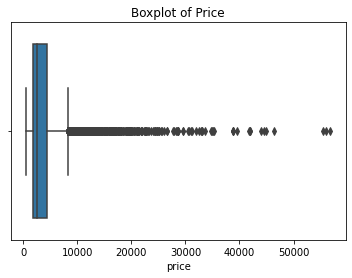

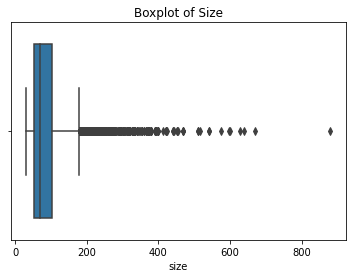

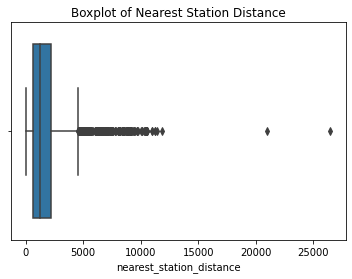

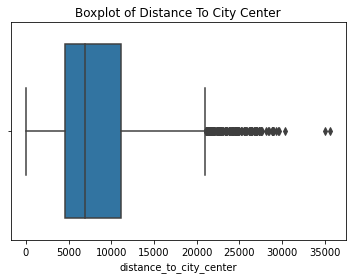

In [8]:
# Look for outliers on numeric columns
for column in rent_data[numeric_cols]:
    fig, ax = plt.subplots()
    sns.boxplot(x=rent_data[column], ax=ax);
    plt.title(f'Boxplot of {column.title().replace("_", " ")}')

In [9]:
# Remove outliers of numeric columns usin zscore < 3
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(rent_data[numeric_cols]))
rent_data = rent_data[(z < 3).all(axis=1)]

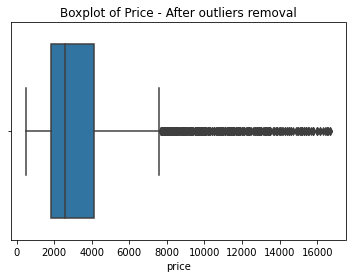

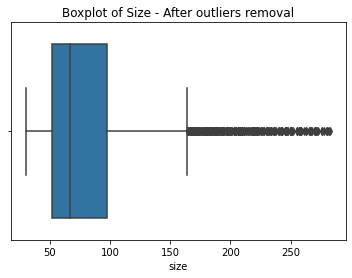

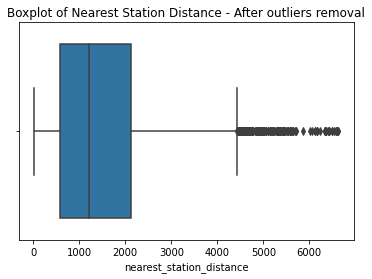

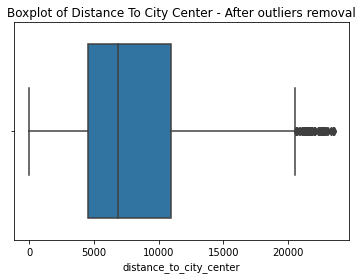

In [10]:
# Plot boxplot after remove outliers
for column in rent_data[numeric_cols]:
    fig, ax = plt.subplots()
    sns.boxplot(x=rent_data[column], ax=ax);
    plt.title(f'Boxplot of {column.title().replace("_", " ")} - After outliers removal')

##### Exploratory Data Analysis

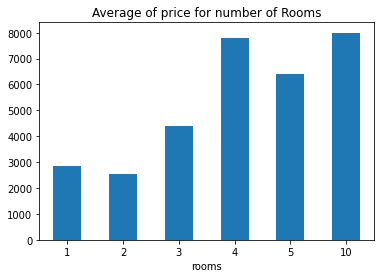

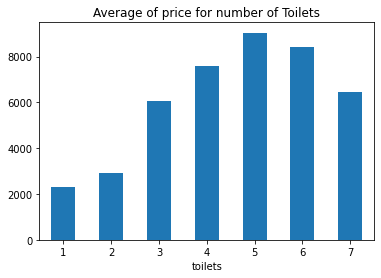

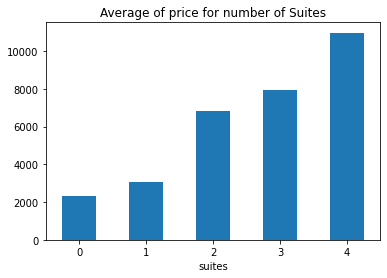

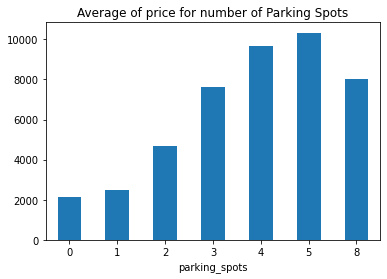

In [11]:
for column in rent_data[categorical_cols]:
    fig, ax = plt.subplots()
    rent_data.groupby(column)['price'].mean().plot(kind='bar', title=f'Average of price for number of {column.title().replace("_", " ")}')
    plt.xticks(rotation=0)

- The more equipped the apartment is, the more expensive. 

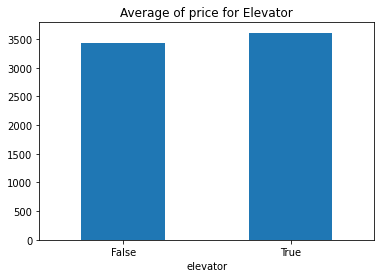

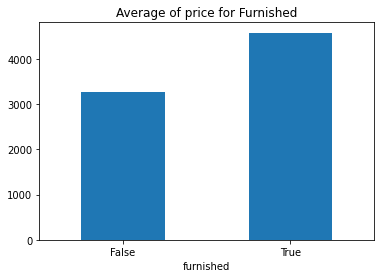

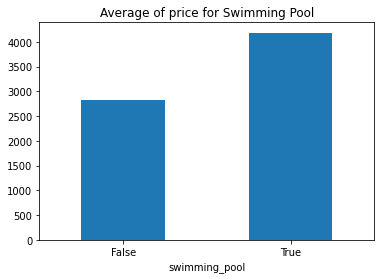

In [12]:
for column in rent_data[bool_cols]:
    fig, ax = plt.subplots()
    rent_data.groupby(column)['price'].mean().plot(kind='bar', title=f'Average of price for {column.title().replace("_", " ")}')
    plt.xticks(rotation=0)

- Most of the apartments are located in buildings with elevators
- Furnished apartments are more expensive than unfurnished
- Condos with swimming pools have more expensive apartments

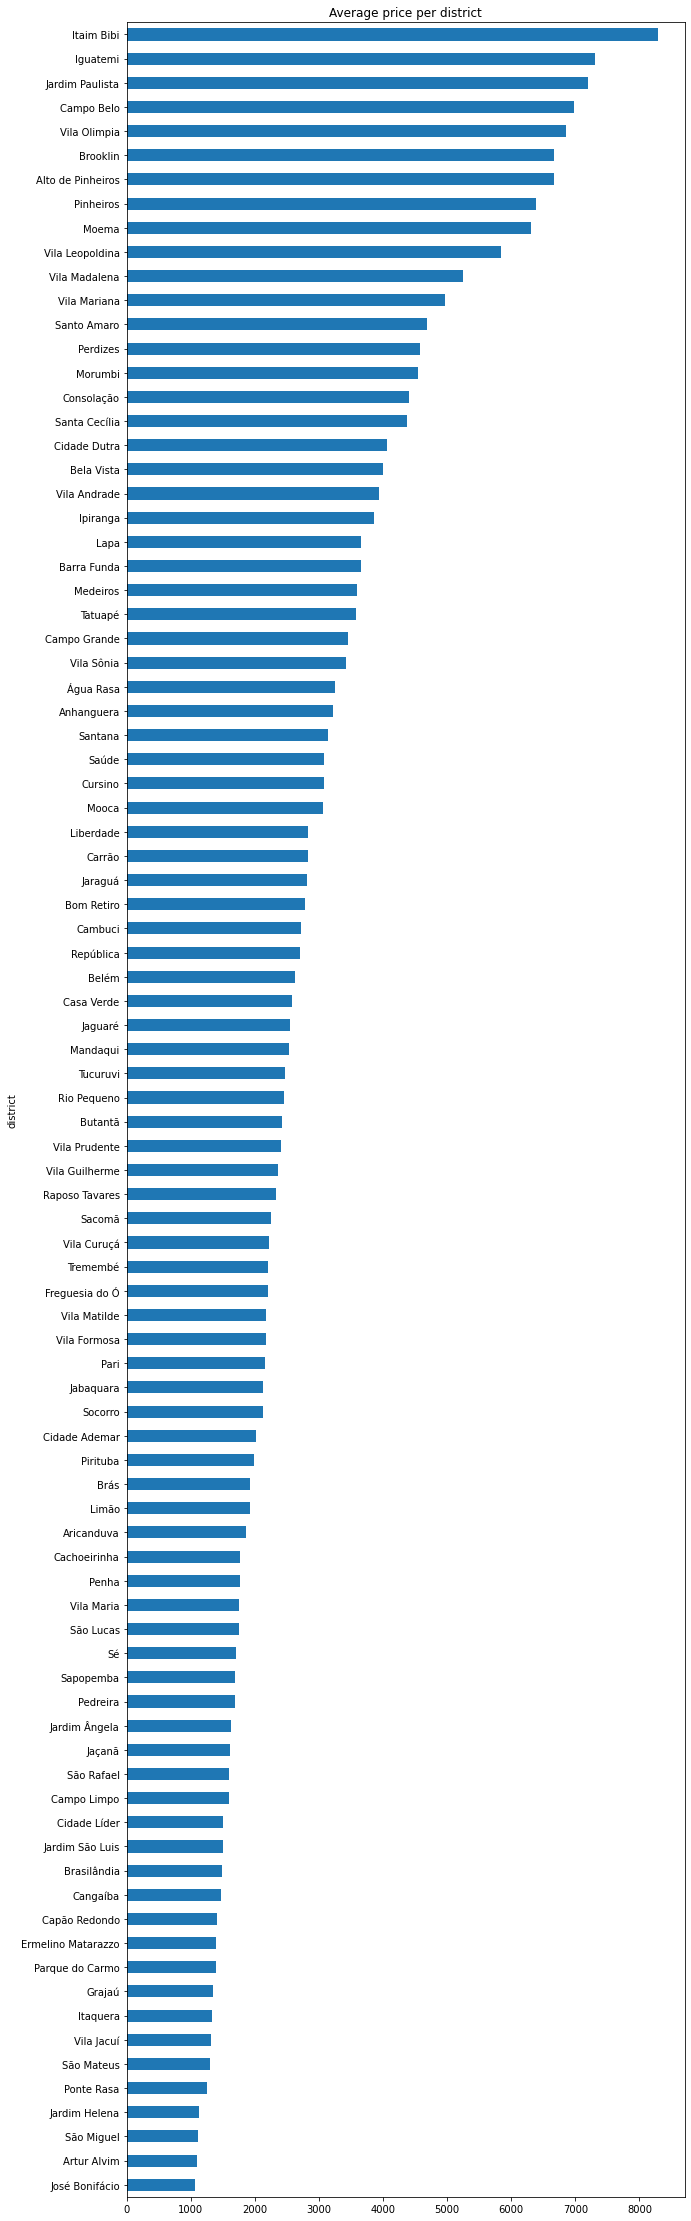

In [13]:
# Average of price for each neighbourhood
rent_data.groupby('district')['price'].mean().sort_values(ascending=True).plot(kind='barh', figsize=(10, 40), title='Average price per district');

<AxesSubplot:title={'center':'Correlations before log transformation'}>

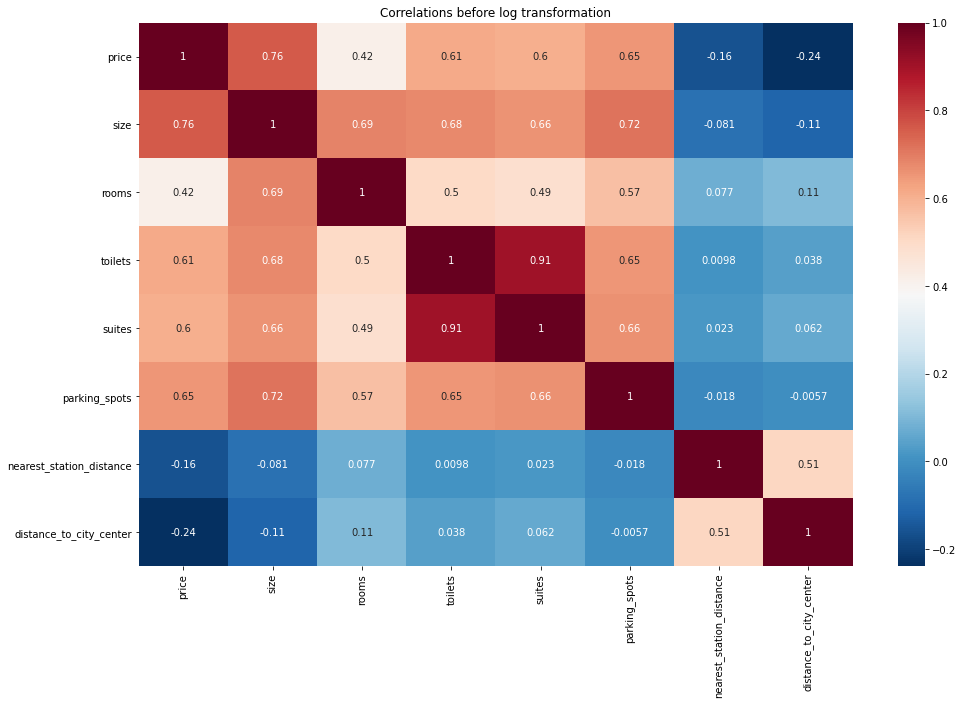

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(16,10))
plt.title('Correlations before log transformation')
sns.heatmap(rent_data.select_dtypes(include='number').corr(), cmap='RdBu_r', annot=True)

- Price is more correlated with the size of the apartment, followed by the number of parking spots and suites.

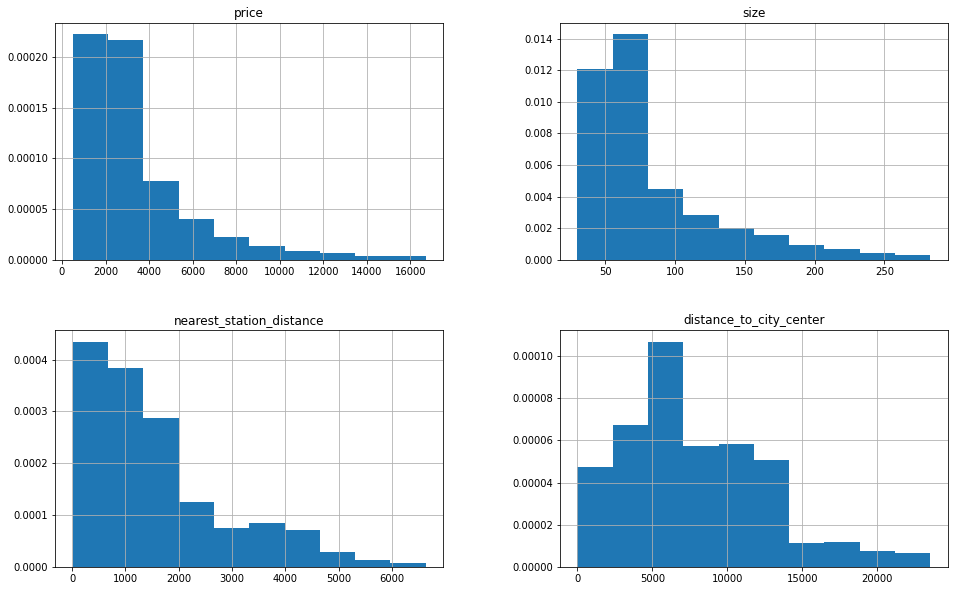

In [15]:
# Distributions
rent_data[numeric_cols].hist(density=True, figsize=(16,10));

- Distributions for price, size and distance to subway are right skewed.

##### Feature Engineering

In [16]:
# Check for skewed distributions
rent_data[numeric_cols].skew()

price                      2.173
size                       1.699
nearest_station_distance   1.245
distance_to_city_center    0.821
dtype: float64

- Some columns are slightly skewed

In [17]:
# Apply a log transformation on the columns with skew distributions
# # In a normal distribution skew = 0
for column in rent_data[numeric_cols]:
    if rent_data[column].skew() > 1:
        print(column)
        rent_data[column] = np.log1p(rent_data[column])

price
size
nearest_station_distance


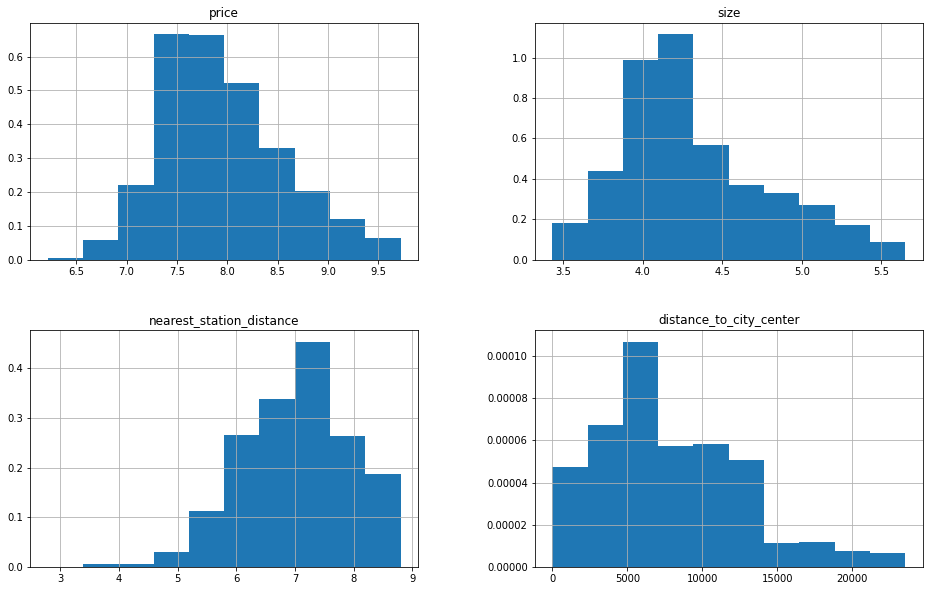

In [18]:
# Distributions after log transformation
rent_data[numeric_cols].hist(density=True, figsize=(16,10));

#### Hypothesis testing: ```price``` and ```size```

Text(0.5, 1.0, 'Regression Plot between size and price')

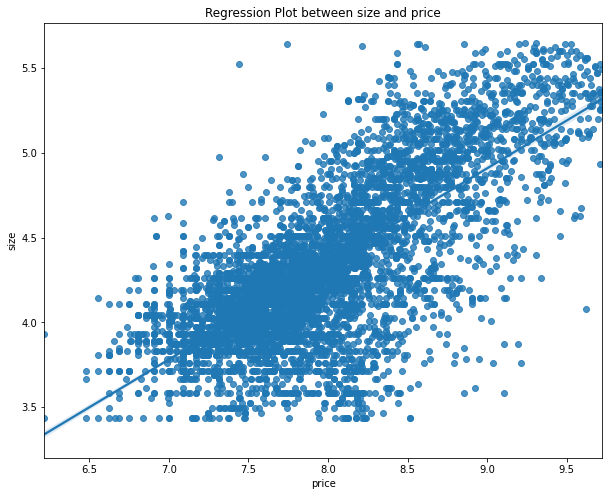

In [19]:
#Plotting regression plot
plt.figure(figsize=(10, 8))
sns.regplot(x='price', y='size', data=rent_data)
plt.title(f'Regression Plot between size and price')

There is a considerable positive correlation between ```price``` and ```size```. Let's check their dependency:
- H0: the two samples are independent.
- H1: there is a dependency between the samples.

In [20]:
#Doing significance testing using correlation
from scipy.stats import pearsonr

pearson, p = pearsonr(rent_data['price'], rent_data['size'])

print(f'Pearson Coefficient is {pearson:.2f}.')
if p > 0.05:
	print(f'Probably independent. p-value = {p:.2f}')
else:
	print(f'Probably dependent. p-value = {p:.2f}')

Pearson Coefficient is 0.73.
Probably dependent. p-value = 0.00


- There appears to be a statistically significant relationship between ```price``` and ```size```, thus we can reject the null hypothesis.
- Also, the variables are highly correlated.

#### Hypothesis testing: ```price``` and ```nearest_station_distance```

Text(0.5, 1.0, 'Regression Plot between nearest_station_distance and price')

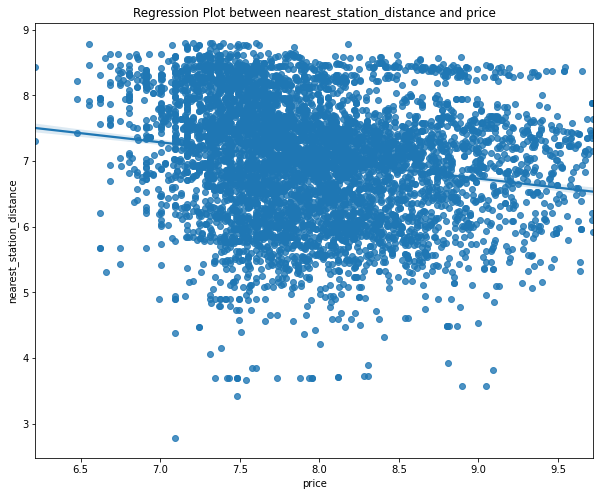

In [21]:
#Plotting regression plot
plt.figure(figsize=(10, 8))
sns.regplot(x='price', y='nearest_station_distance', data=rent_data)
plt.title('Regression Plot between nearest_station_distance and price')

There is a slight negative correlation between ```price``` and ```nearest_station_distance```. Let's check their dependency:
- H0: the two samples are independent.
- H1: there is a dependency between the samples.

In [22]:
# Doing significance testing using correlation
from scipy.stats import pearsonr

pearson, p = pearsonr(rent_data['price'], rent_data['nearest_station_distance'])

print(f'Pearson Coefficient is {pearson:.2f}.')
if p > 0.05:
	print(f'Probably independent. p-value = {p:.2f}')
else:
	print(f'Probably dependent. p-value = {p:.2f}')

Pearson Coefficient is -0.18.
Probably dependent. p-value = 0.00


- There appears to be a statistically significant relationship between ```price``` and ```nearest_station_distance```, thus we can reject the null hypothesis.
- But there is little correlation between the variables.

#### Hypothesis testing: ```price``` and ```distance_to_city_center```

Text(0.5, 1.0, 'Regression Plot between nearest_station_distance and price')

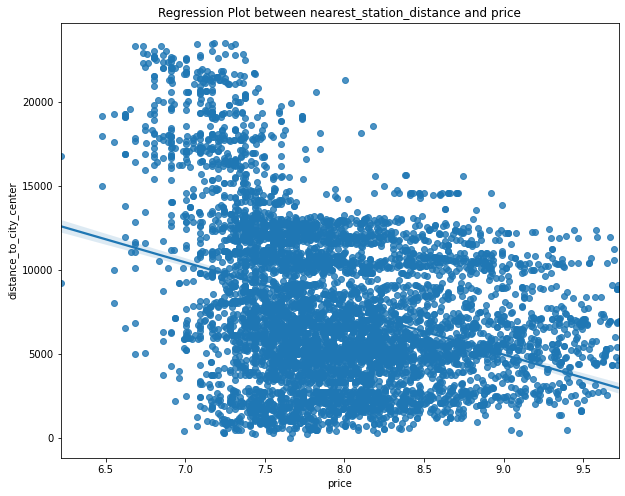

In [23]:
#Plotting regression plot
plt.figure(figsize=(10, 8))
sns.regplot(x='price', y='distance_to_city_center', data=rent_data)
plt.title('Regression Plot between nearest_station_distance and price')

There is a slightly considerable negative correlation between the ```price``` and the ```distance_to_city_center```. Let's check their dependency:
- H0: the two samples are independent.
- H1: there is a dependency between the samples.

In [24]:
# Doing significance testing using correlation
from scipy.stats import pearsonr

pearson, p = pearsonr(rent_data['price'], rent_data['distance_to_city_center'])

print(f'Pearson Coefficient is {pearson:.2f}.')
if p > 0.05:
	print(f'Probably independent. p-value = {p:.2f}')
else:
	print(f'Probably dependent. p-value = {p:.2f}')

Pearson Coefficient is -0.35.
Probably dependent. p-value = 0.00


- There appears to be a statistically significant relationship between ```price``` and ```distance_to_city_center```, thus we can reject the null hypothesis.
- But there is little correlation between data.

#### Exporting clean data to csv

In [25]:
rent_data.to_csv('cleaned_rent_data.csv', index=False)

### Suggestions for next steps in analyzing this data

- Gather more data from the neighbourhood (i.e. number of shops and leisure equipment using Foursquare or Google APIs)
- Perform one-hot-encoding with the districts
- Normalise the data